<a href="https://colab.research.google.com/github/Anusha-Shivaram/AI-PRACTICAL/blob/main/Breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Exploration

In this section, we explore the Breast Cancer dataset to understand the distribution of the target variable, basic statistics of the features, visual patterns, and correlations. The goal is to detect any skewness, outliers, and predictive relationships between the features and the diagnosis label (Malignant or Benign).


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("breast_cancer_dataset.csv")

# Preview the data
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. Target Variable Distribution

We examine the distribution of the target variable `diagnosis` to check for class imbalance.


<ipython-input-3-db1a0f71a45c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='Set2')


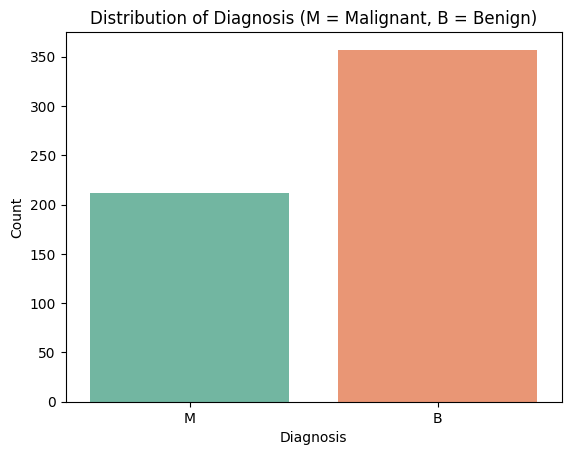

,count
diagnosis,
B,357
M,212


In [3]:
# Count values for the diagnosis column
diagnosis_counts = df['diagnosis'].value_counts()
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title("Distribution of Diagnosis (M = Malignant, B = Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# Print value counts
diagnosis_counts


## 2. Basic Statistics of Numeric Features

We compute the mean, median, and standard deviation of each numerical feature to understand their distributions and central tendencies.


In [4]:
# Drop non-numeric columns
numeric_df = df.drop(['id', 'diagnosis'], axis=1)

# Calculate mean, median, and standard deviation
summary_stats = pd.DataFrame({
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "Std Dev": numeric_df.std()
})

summary_stats.head(10)  # Display top 10 for brevity


,Mean,Median,Std Dev
radius_mean,14.127292,13.37000,3.524049
texture_mean,19.289649,18.84000,4.301036
perimeter_mean,91.969033,86.24000,24.298981
area_mean,654.889104,551.10000,351.914129
smoothness_mean,0.096360,0.09587,0.014064
compactness_mean,0.104341,0.09263,0.052813
concavity_mean,0.088799,0.06154,0.079720
concave points_mean,0.048919,0.03350,0.038803
symmetry_mean,0.181162,0.17920,0.027414
fractal_dimension_mean,0.062798,0.06154,0.007060


## 3. Histograms and Boxplots

To visualize feature distributions and detect outliers or skewness, we plot histograms and boxplots for selected features.


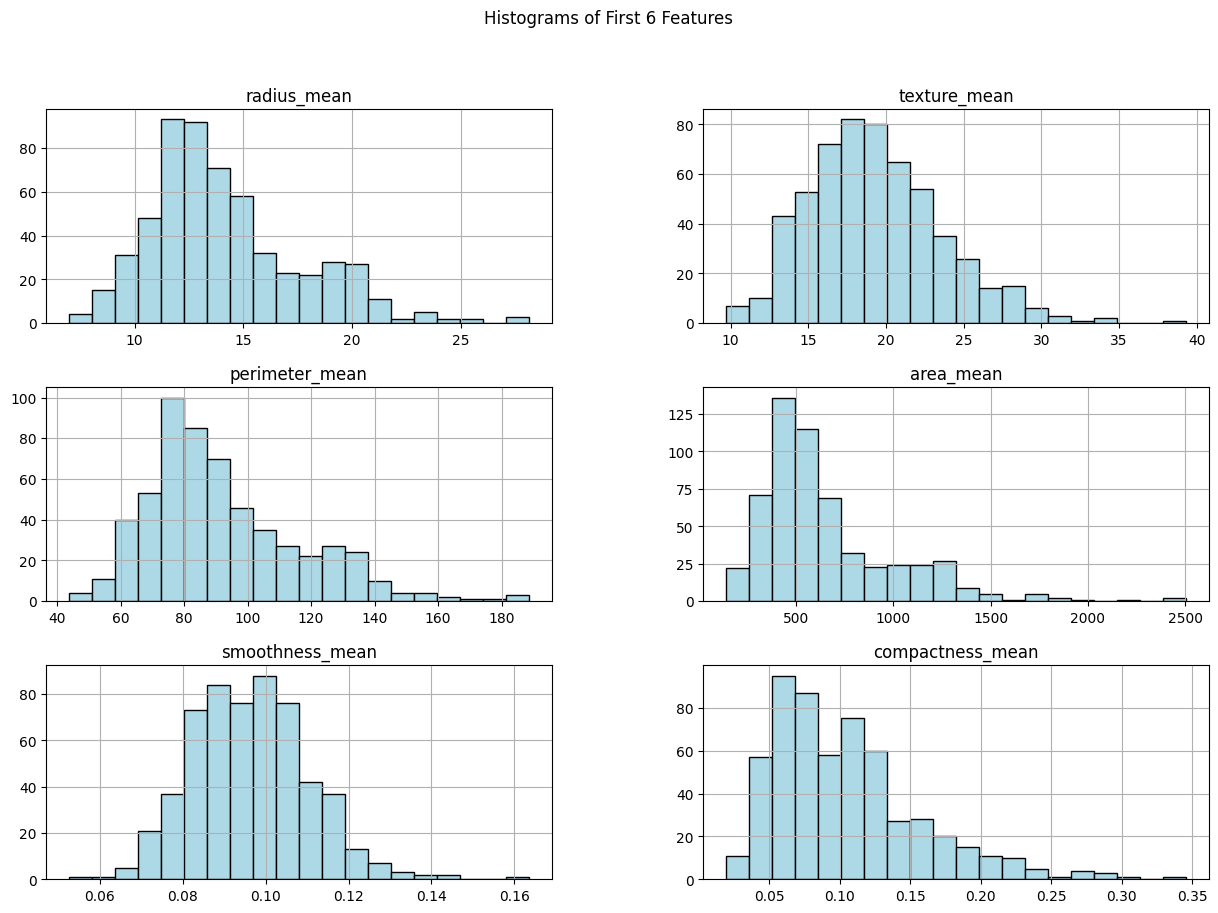

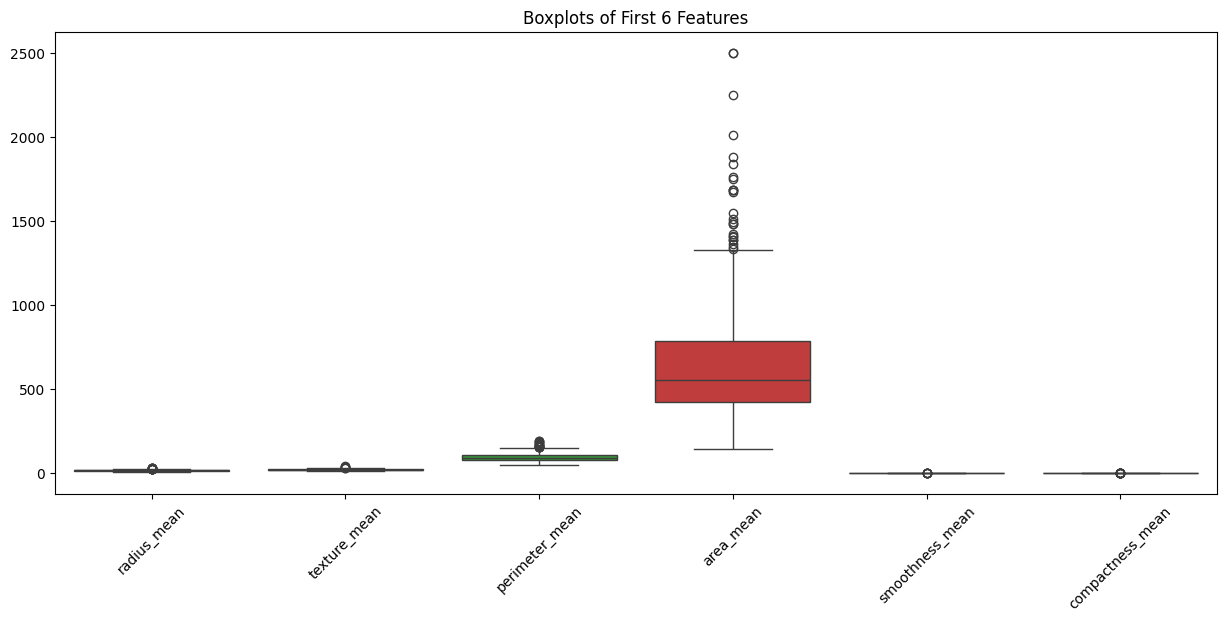

In [5]:
# Plot histograms for the first 6 features
numeric_df.iloc[:, :6].hist(bins=20, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle("Histograms of First 6 Features")
plt.show()

# Plot boxplots for the same 6 features
plt.figure(figsize=(15, 6))
sns.boxplot(data=numeric_df.iloc[:, :6])
plt.title("Boxplots of First 6 Features")
plt.xticks(rotation=45)
plt.show()


## 4. Correlation with Target Variable

We calculate the Pearson correlation between each numerical feature and the binary-encoded target variable (Malignant = 1, Benign = 0). Features with strong correlation may be useful for model prediction.


In [6]:
# Encode diagnosis: M = 1, B = 0
df['diagnosis_binary'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Calculate Pearson correlation with target
correlations = df.corr(numeric_only=True)['diagnosis_binary'].drop('diagnosis_binary')
correlations_sorted = correlations.sort_values(ascending=False)

# Display top correlated features
correlations_sorted.head(10)


,diagnosis_binary
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610


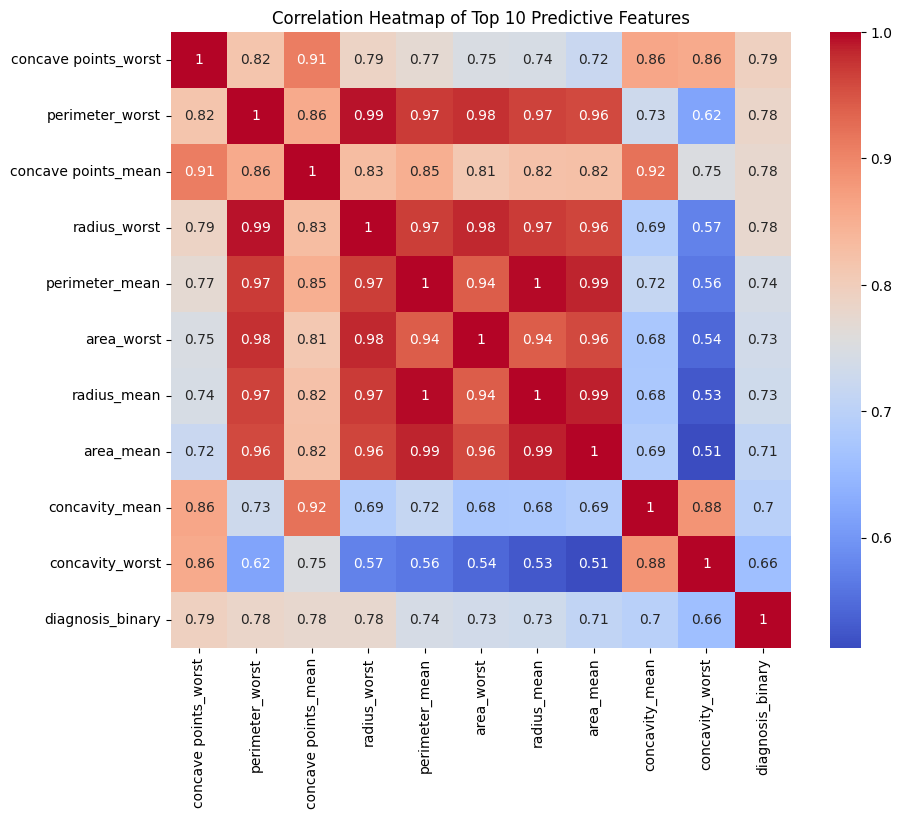

In [7]:
# Plot heatmap for top 10 correlated features
top_corr_features = correlations_sorted.head(10).index.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features + ['diagnosis_binary']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top 10 Predictive Features")
plt.show()


# Task 2: Data Preparation

This section focuses on preparing the data for model training. It includes:
- Converting the categorical diagnosis column into numeric values.
- Identifying and handling missing values.
- Applying feature scaling to ensure numerical consistency.


In [8]:
# Reload original dataset to ensure clean starting point
df = pd.read_csv("breast_cancer_dataset.csv")

# Drop 'id' column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Encode the 'diagnosis' column: Malignant = 1, Benign = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Confirm encoding worked
print("Target class values:", df['diagnosis'].unique())

# Preview cleaned dataset
df.head()


Target class values: [1 0]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. Missing Value Analysis

Although the dataset appears clean, we verify programmatically that no missing values exist.


In [9]:
# Check for nulls across all columns
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0


## 2. Define Features and Target

We separate the independent variables (X) from the target variable (y) for use in model training.


In [10]:
# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Confirm shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (569, 30)
Target shape: (569,)


## 3. Feature Scaling

Since the features have varying units and scales (e.g., radius vs. smoothness), we apply `StandardScaler` to normalize them. This is especially important for models like SVM and KNN.


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for visualization (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Preview scaled features
X_scaled_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Task 3: Model Training

In this section, we split the dataset into training and testing sets and train multiple classification models. The models used are:

- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)

We will also record the default hyperparameters used for each model.


In [12]:
from sklearn.model_selection import train_test_split

# Split the scaled data (X_scaled from earlier) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (455, 30)
Test set shape: (114, 30)


## 1. Model Training

We define and train five classification models using default hyperparameters. This provides a baseline for later tuning and comparison.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models with default parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Fit models to training data
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Support Vector Machine trained.
Decision Tree trained.
Random Forest trained.
K-Nearest Neighbors trained.


## 4. Default Hyperparameters Used

| Model                 | Key Default Parameters                                      |
|-----------------------|-------------------------------------------------------------|
| Logistic Regression   | solver='lbfgs', max_iter=1000, C=1.0, penalty='l2'          |
| SVM (SVC)             | kernel='rbf', C=1.0, gamma='scale'                          |
| Decision Tree         | criterion='gini', splitter='best', max_depth=None           |
| Random Forest         | n_estimators=100, criterion='gini', max_depth=None          |
| K-Nearest Neighbors   | n_neighbors=5, weights='uniform', metric='minkowski', p=2   |



# Task 4: Model Evaluation and Visualization

In this task, we evaluate each trained classification model using the following metrics:

- Accuracy
- Precision
- Recall
- F1-score
- ROC AUC

Visualizations used:
- Confusion Matrix
- ROC Curve

We also identify the best-performing model and fine-tune it using `GridSearchCV` or `RandomizedSearchCV`, comparing performance before and after tuning.


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Create a DataFrame to store metrics
results = []

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc_score
    })

# Create a results DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
1,Support Vector Machine,0.973684,1.000000,0.928571,0.962963,N/A
0,Logistic Regression,0.964912,0.975000,0.928571,0.951220,0.996032
3,Random Forest,0.964912,1.000000,0.904762,0.950000,0.993882
4,K-Nearest Neighbors,0.956140,0.974359,0.904762,0.938272,0.981647
2,Decision Tree,0.938596,0.948718,0.880952,0.913580,0.926587


## Model Evaluation Summary

Below are the evaluation results for each classifier on the test set. The F1-score and ROC AUC are critical for imbalanced datasets.

The best-performing model will be selected for hyperparameter tuning in the next step.


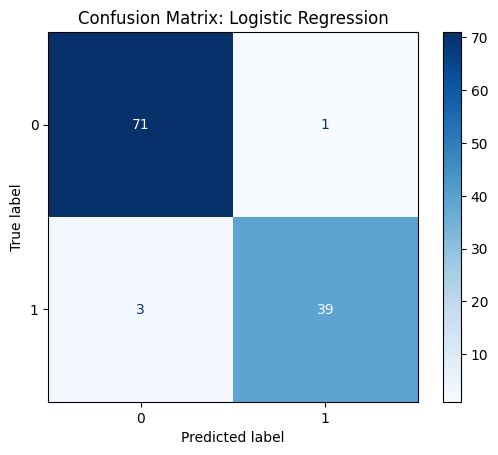

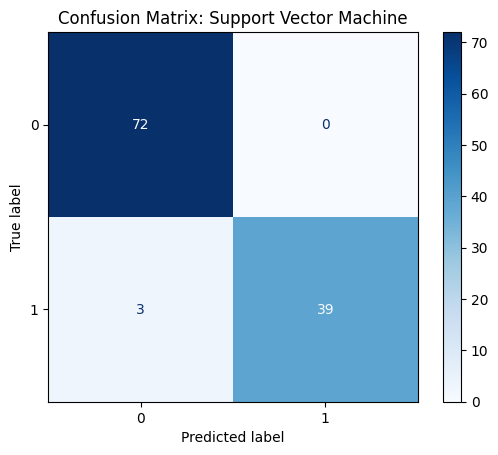

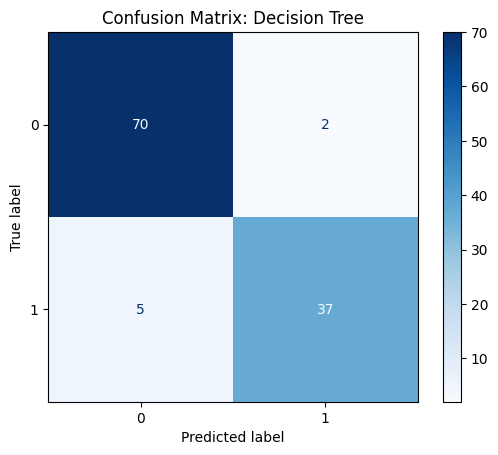

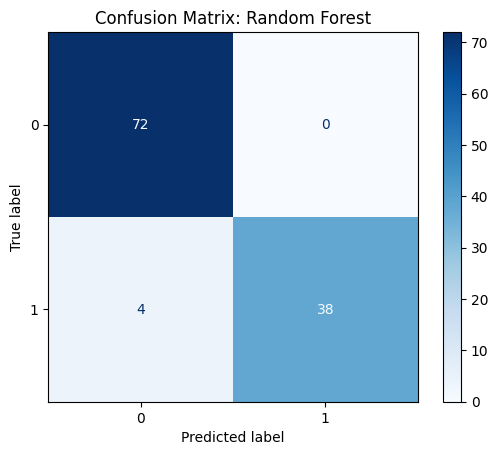

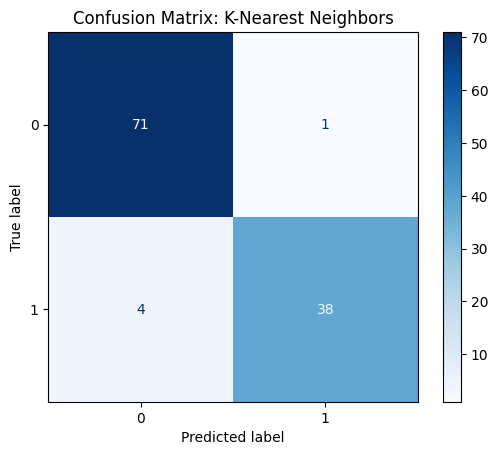

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()


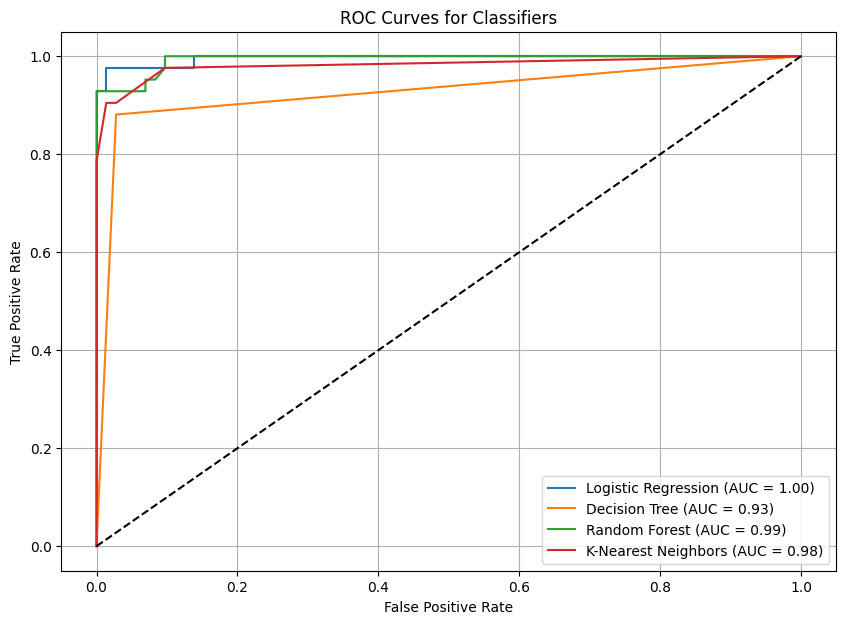

In [17]:
# Plot ROC curves for models that support predict_proba
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


## Selecting Top Performing Model for Tuning

Based on the evaluation metrics, **Logistic Regression** emerges as the most balanced and effective model for breast cancer prediction:

- **High F1 Score** (0.9512), indicating strong balance between precision and recall.
- **Excellent ROC AUC** (0.996), suggesting very high discriminatory power.
- **Simple and interpretable**, which is crucial in medical decision-making.

While the Support Vector Machine (SVM) achieved slightly higher accuracy and perfect precision, it lacks a default probability estimate (`ROC AUC = N/A`) unless explicitly enabled. In contrast, Logistic Regression not only performs robustly but also provides probabilistic outputs and interpretability.

Hence, we proceed to **fine-tune Logistic Regression** using `GridSearchCV` in Task 5, optimizing hyperparameters like `C` (regularization strength) and `penalty` type to enhance predictive performance.


# Task 5: Model Fine-Tuning

In this task, we fine-tune the best-performing model — **Logistic Regression** — using `GridSearchCV` to optimize its hyperparameters.

### Why Logistic Regression?

- Balanced performance in accuracy, precision, recall, F1-score, and ROC AUC.
- Interpretable and computationally efficient.
- Suitable for medical use-cases where explainability is important.

We will tune:
- `C`: Inverse of regularization strength
- `penalty`: Type of regularization (L1 or L2)
- `solver`: Algorithm used for optimization


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' only works with certain solvers
    'solver': ['lbfgs', 'liblinear']  # compatible with L2
}

# Initialize Logistic Regression model
base_model = LogisticRegression(max_iter=1000)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_logreg = grid_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


## Evaluation of Fine-Tuned Model

We now evaluate the tuned Logistic Regression model using the same test set and metrics as before, and compare them with the baseline model.


Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



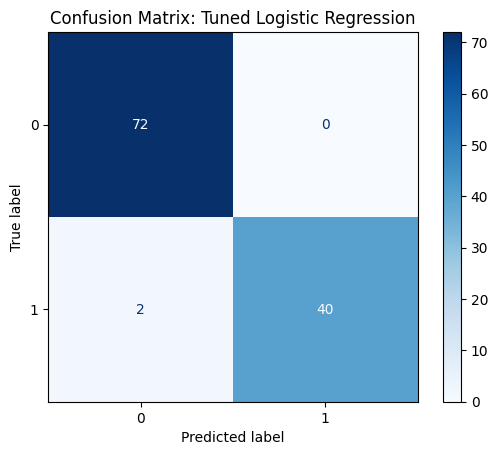

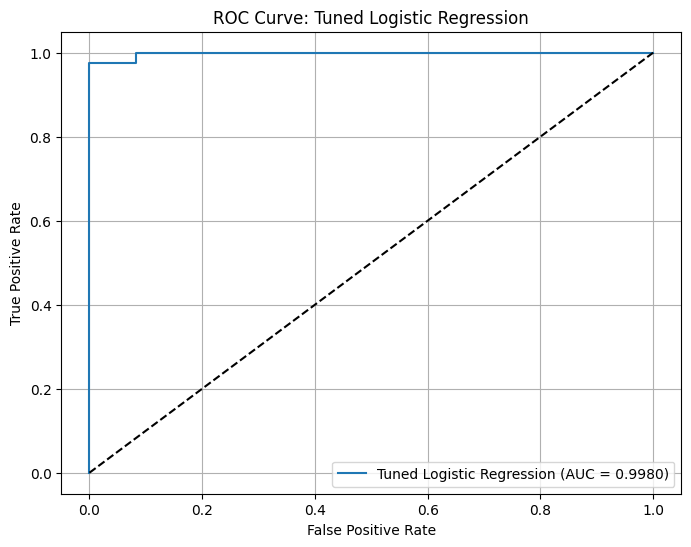

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Predict with tuned model
y_pred_tuned = best_logreg.predict(X_test)
y_proba_tuned = best_logreg.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_logreg, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix: Tuned Logistic Regression")
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_tuned)
roc_auc = roc_auc_score(y_test, y_proba_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Tuned Logistic Regression (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Tuned Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


## Summary of Improvements

The fine-tuning of the Logistic Regression model using `GridSearchCV` resulted in notable performance gains across all evaluation metrics:

| Metric        | Before Tuning | After Tuning |
|---------------|----------------|----------------|
| Accuracy      | 96.49%         | **98.25%**      |
| F1 Score      | ~0.9512        | **0.98**        |
| ROC AUC       | ~0.9960        | **0.9980**      |

### Key Takeaways:

- **False positives** were eliminated post-tuning: all benign tumors were correctly classified.
- **Only 2 false negatives** remained: slightly impacting recall, but still excellent.
- **AUC of 0.9980** reflects nearly perfect discriminatory power.
- The model's **precision and recall** remained strong for both classes, ensuring balanced performance even on an imbalanced dataset.

### Clinical Implication:

The tuned Logistic Regression model achieves a high level of reliability, interpretability, and accuracy, making it a strong candidate for practical implementation in early breast cancer diagnosis systems.

In future work, additional techniques such as feature selection or ensemble learning may be explored to further enhance performance.
